In [1]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph, distance
from auxiliary import get_base_network_name
from auxiliary import getLinearReg

%matplotlib inline

net_type = 'DT'
param = 'param'

net_dir = os.path.join('..', 'networks', net_type)

In [ ]:
N_values = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
N_values = [16384*2, 16384*4, 16384*8, 16384*16]
iterations = 10
d_values = {}
for N in N_values:
    diameters = np.zeros(iterations)
    for i in range(iterations):
        g = create_proximity_graph('DT', N=N)
        d = g.diameter()
        diameters[i] = d
    print(N, diameters.mean())
    d_values[N] = diameters

32768 87.8
65536 119.6


In [ ]:
N_values = [
    #128, 256, 512, 1024, 2048, 4096, 8192, 
    16384
]
N_values = [16384*2, 16384*4, 16384*8, 16384*16]
iterations = 1
meanl_values = {}
for N in N_values:
    meanls = np.zeros(iterations)
    for i in range(iterations):
        g = create_proximity_graph('DT', N=N)
        meanl = g.average_path_length(directed=False)
        meanls[i] = meanl
    print(N, meanls.mean())
    meanl_values[N] = meanls

In [53]:
if net_type == 'DT':
    diameters = [9.37, 12.42, 15.94, 20.66, 27.25, 36.01, 48.5, 64.7, 87.8, 119.6]
    meanls = [4.721,  6.177,  8.102, 10.801, 13.946, 18.562, 24.187, 32.666]
elif net_type == 'PDT':
    diameters = [7.71, 10.41, 14.13, 19.46, 26.73, 36.67, 50.61, 70.033]
    meanls = [4.027,  5.487,  7.444, 10.183, 14.015, 19.277, 26.814, 37.227]
    
    
N_values = np.array([128, 256, 512, 1024, 2048, 4096, 8192])#, 16384, 32768]

diameters = np.zeros_like(N_values)
meanls = np.zeros(N_values.size)

for i, N in enumerate(N_values):
    diameters_file = os.path.join(net_dir, 'diameters_N{}.txt'.format(N))
    d_values = np.loadtxt(diameters_file)
    meanl_file = os.path.join(net_dir, 'meanl_N{}.txt'.format(N))
    meanl_values = np.loadtxt(meanl_file)
    diameters[i] = d_values.mean()
    meanls[i] = meanl_values.mean()
    print(N, diameters[i], meanls[i])


128 9 4.689231799
256 12 6.201694144
512 15 8.159518731
1024 20 10.722972518
2048 27 14.053569915
4096 35 18.476616460000002
8192 47 24.380997434243177


[22.627417   32.         45.254834   64.         90.50966799] [15 20 27 35 47]
[22.627417   32.         45.254834   64.         90.50966799] [ 8.15951873 10.72297252 14.05356992 18.47661646 24.38099743]


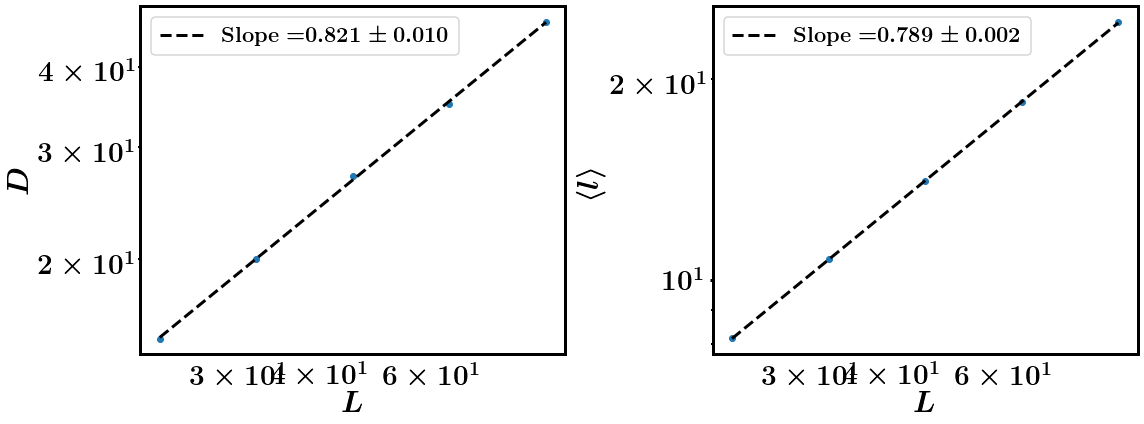

In [54]:
#N_values =  [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
#N_values = np.power(2, np.arange(7, 17))

fig, axes = plt.subplots(figsize=(16,6), ncols=2)

ax = axes[0]
ax.set_ylabel(r'$D$')
ax = axes[1]
ax.set_ylabel(r'$\langle l \rangle$')

for ax, Y in zip(axes, [diameters, meanls]):

    L_values = np.sqrt(N_values)
    #X = L_values[:len(Y)]
    X = L_values[-5:]
    Y = Y[-5:]
    
    ax.set_xlabel(r'$L$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(X, Y, 'o')
    
    print(X, Y)
    Y_pred, slope, y_err = getLinearReg(X, Y)    
    c = Y[0] / X[0]**slope
    label = r'$\mathrm{Slope} = $' + r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
    ax.plot(X, Y_pred, '--', color='k', label=label)
    ax.legend(fontsize=22)

plt.tight_layout()

fig_name = os.path.join(fig_dir, 'D_and_meanl_vs_L_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

In [ ]:
its = 1
ew_dict = {}

In [34]:
N_values = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
for N in N_values:
    print(N)
    if N in ew_dict:
        continue
    edge_weights = []
    for it in range(its):
        g = create_proximity_graph('DT', N=N)
        positions = g.vs['position']
        for e in g.es():
            s, t = e.tuple
            edge_weights.append(distance(s, t, positions))
    edge_weights = np.array(edge_weights)
    ew_dict[N] = edge_weights


128
256
512
1024
2048
4096
8192
16384


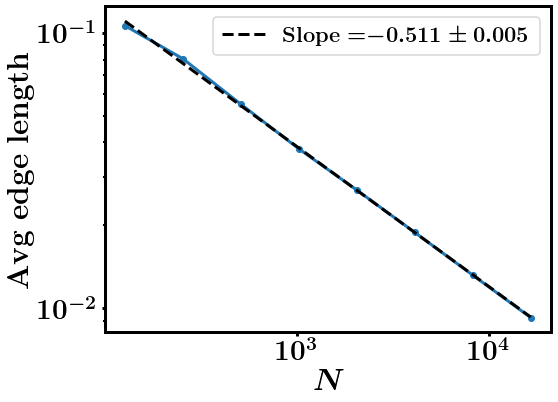

In [35]:
w_mean = np.zeros(len(N_values))
for i, N in enumerate(N_values):
    w_mean[i] = ew_dict[N].mean()

X = N_values
Y = w_mean
    
fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\mathrm{Avg\;edge\;length}$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(X, Y, '-o')

Y_pred, slope, y_err = getLinearReg(X, Y)    
c = Y[0] / X[0]**slope
label = r'$\mathrm{Slope} = $' + r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.legend(fontsize=22)

plt.show()

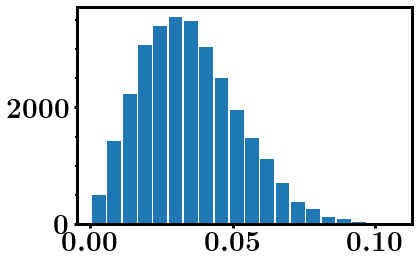

In [25]:
fig, ax = plt.subplots()

ax.hist(edge_weights[edge_weights < 0.5], bins=20, rwidth=0.9)

plt.show()

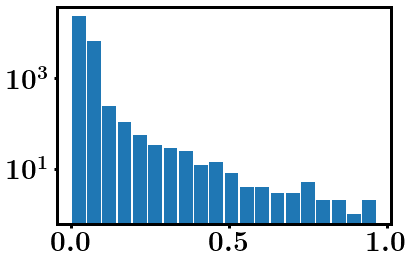

In [29]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.hist(edge_weights[edge_weights < 0.999], bins=20, rwidth=0.9)

plt.show()

In [18]:
(edge_weights > 0.5).sum()

128

In [19]:
(edge_weights < 0.5).sum()

2944

In [56]:
g = ig.Graph()

edgelist = [
    (0, 1),
    (1, 2),
    (2, 3),
    (4, 5),
    (5, 6),
]

g.add_vertices(7)
g.add_edges(edgelist)
print(g.summary())
print(g.diameter(directed=False))
print(g.average_path_length(directed=False))

IGRAPH U--- 7 5 -- 
3
1.5555555555555556
